## Mesh study for 3 different refinement levels of the mesh.t_rounded

### General functions

In [1]:
# loading libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
paths = ['../test_cases/kOmega-SST_2D/run/kOmegaSST_mesh.t2_rounded_a1=28_initSteady/transient',
         '../test_cases/kOmega-SST_2D/run/kOmegaSST_mesh.t3_rounded_a1=28_initSteady/transient',
         '../test_cases/kOmega-SST_2D/run/kOmegaSST_mesh.t4_rounded_a1=28_initSteady/transient']

# time to which case was solved used for the pressure difference 
last_time = 2

# number of iterations at which the wall shear stress is analyzed
time = 0.05
time_mean = 2

# angle of the ramp
angle = 20

# density of the airflow 
rhoL = 1.225

In [3]:
def process_file(file_path):
    data_pairs = []

    with open(file_path, 'r') as f:
        for line in f:
            if line.strip().startswith('#') or not line.strip():
                continue

            parts = line.strip().split()
            if len(parts) >= 9:
                x = float(parts[0])*1000 # in mm

                area = np.array([
                    float(parts[6]),
                    float(parts[7]),
                    float(parts[8])
                ])
                norm = np.linalg.norm(area)
                area_normalized = area / norm if norm != 0 else area
                
                # cross product of the ez and and area normal vektor to get a vector following the wall
                ez = np.array([0, 0, 1])
                cross_prod = np.cross(area_normalized, ez)

                shear = np.array([
                    float(parts[3]),
                    float(parts[4]),
                    float(parts[5])
                ])

                # transformation of the wss vector in the wall following COS
                scalar_product = np.dot(shear, cross_prod)

                # multiplying by density to get [Pa]
                wss = rhoL*scalar_product
                data_pairs.append((x, wss))

    # sorting
    data_pairs.sort(key=lambda pair: pair[0])
    return sorted(data_pairs, key=lambda pair: pair[0])


def plot_wss():
    x_vals = []          # Liste für x-Werte-Arrays
    scalar_vals = []     # Liste für Skalarwert-Arrays

    for i in range(1, 4):
        file_path = (
            str(paths[i - 1]) + "/postProcessing/samplesLower/" + str(time) + "/wallShearStress_lowerWall.raw"
        )

        data_pairs = process_file(file_path)
        
        x_vals.append([pair[0] for pair in data_pairs])
        scalar_vals.append([pair[1] for pair in data_pairs])
            #print(scalar_vals[0])

    plt.figure(figsize=(12, 6))
    plt.plot(x_vals[0], scalar_vals[0], label = 'mesh.t2_rounded')
    plt.plot(x_vals[1], scalar_vals[1], label = 'mesh.t3_rounded')
    plt.plot(x_vals[2], scalar_vals[2], label = 'mesh.t4_rounded')
        
    plt.title('wall shear stresses at the lower wall')
    plt.xlabel('global x value in mm ')
    plt.ylabel('wall shear stress in Pa')
    plt.xlim(0, 400)
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [9]:
def plot_mean_wss():   
    x_vals_mean = []        
    scalar_vals_mean = []  

    for j in range(1, 4):
        file_path = (
            str(paths[j - 1]) + "/postProcessing/samplesLower/" + str(time_mean) + "/wallShearStressMean_lowerWall.raw"
        )

        data_pairs = process_file(file_path)
        
        x_vals_mean.append([pair[0] for pair in data_pairs])
        scalar_vals_mean.append([pair[1] for pair in data_pairs])
            #print(scalar_vals[0])

    plt.figure(figsize=(12, 6))
    plt.plot(x_vals_mean[0], scalar_vals_mean[0], label = 'mesh.t2_rounded')
    plt.plot(x_vals_mean[1], scalar_vals_mean[1], label = 'mesh.t3_rounded')
    plt.plot(x_vals_mean[2], scalar_vals_mean[2], label = 'mesh.t4_rounded')
        
    plt.title('Mean wall shear stresses at the lower wall')
    plt.xlabel('global x value in mm ')
    plt.ylabel('Mean wall shear stress in Pa')
    plt.xlim(0, 400)
    plt.ylim(-1.5, 1.5)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [5]:
def delta_p(file_path):
    data_pairs = []

    with open(file_path, 'r') as f:
        for line in f:
            if line.strip().startswith('#') or not line.strip():
                continue

            parts = line.strip().split()

            time = float(parts[0])

            # using the absolute value of p_inlet as delta_p
            delta_p = np.array(abs(float(parts[1])))

            data_pairs.append((time, delta_p))
    return data_pairs

def plot_delta_p():
    time_p=[]
    data_p=[]
    for i in range (1,4):
        file_path = (
            str(paths[i-1]) + "/postProcessing/delta_p:pInlet/0/surfaceFieldValue.dat"
        )

        data_pairs = delta_p(file_path)
        time_p.append([pair[0] for pair in data_pairs])
        data_p.append([pair[1] for pair in data_pairs])

    plt.figure(figsize=(12, 6)) 
    plt.plot(time_p[0], data_p[0], label ='mesh.t2_rounded')
    plt.plot(time_p[1], data_p[1], label ='mesh.t3_rounded')
    plt.plot(time_p[2], data_p[2],label ='mesh.t4_rounded')
        
    plt.title('Pressure difference over the diffusor')
    plt.xlabel('time')
    plt.ylabel('absolute value of the pressure in m²/s²')
    plt.xlim(0, last_time)
    #plt.ylim(-0.5, 0.5)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

### Results

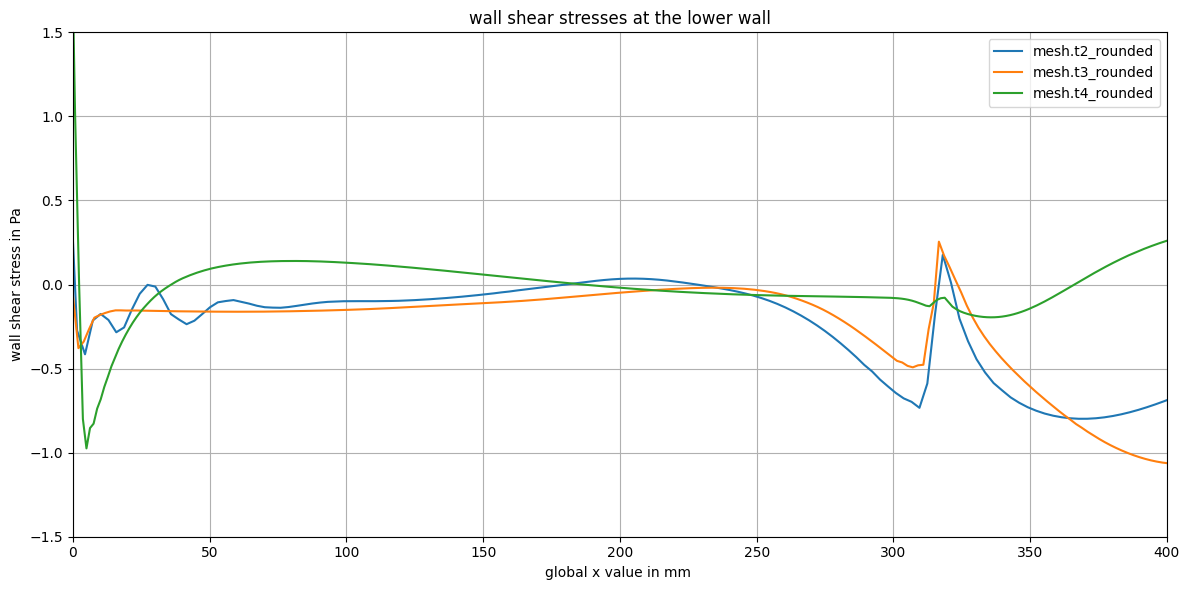

In [6]:
plot_wss()

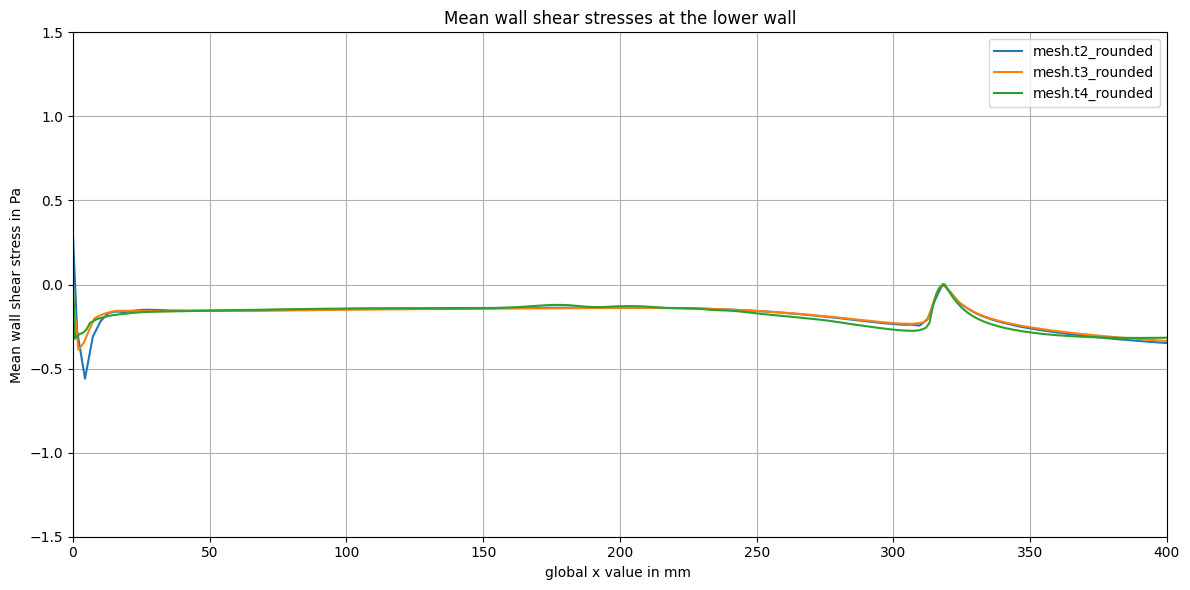

In [10]:
plot_mean_wss()

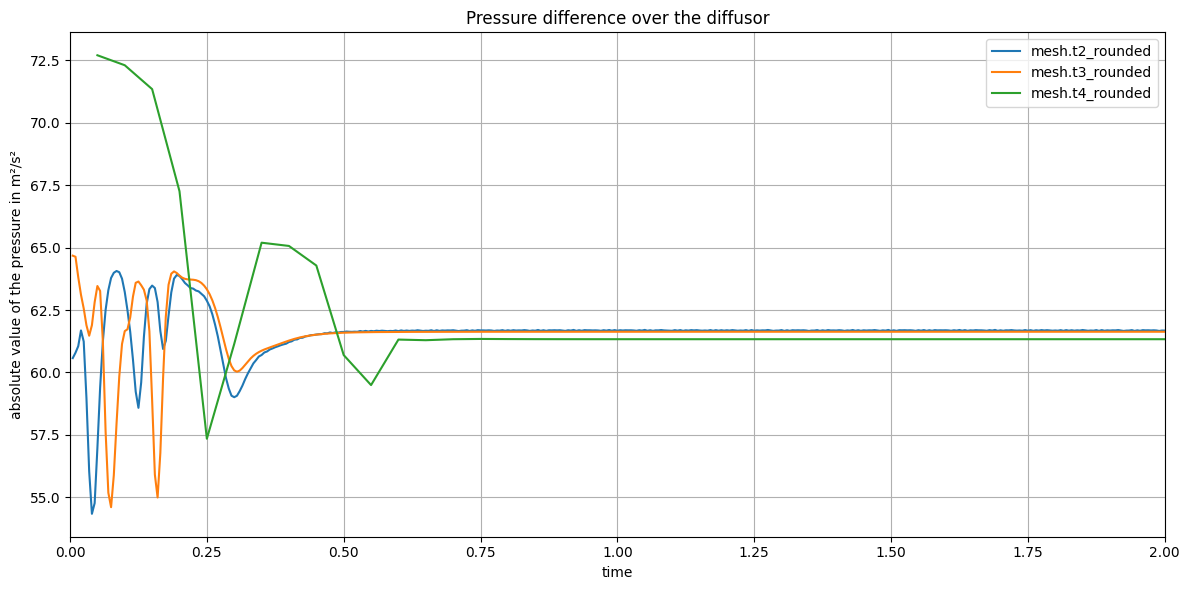

In [8]:
plot_delta_p()